# Task B

In [47]:
#connect to google
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
cd '/content/drive/My Drive/Colab Notebooks/Group 1'

/content/drive/My Drive/Colab Notebooks/Group 1


# For Traditional Machine learning

The code of the Ramdom Forest and fine tuning process are put in the end of Task A notebook

# For Deeplearning 

# Basic data processing for the text analysis

In [49]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import html
import string
import torch
from torch import nn
import torch.nn.functional as F
from torch import utils
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from html.parser import HTMLParser
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, confusion_matrix
from wordcloud import WordCloud
from collections import Counter
np.random.seed(0)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [50]:
data = pd.read_csv('train.csv')
Kaggle_test=pd.read_csv('test.csv',index_col=0)

In [51]:
data.head()

,rating,reviewText,summary
0,3,Plot Storyline: 5 StarsThis novel accomplished...,3 1/4 Stars
1,3,I did not like how EL ended this one. I don't ...,"It was going great, then just.... ended"
2,5,I love how old fashioned this family is - they...,LOVED ALL 4!
3,5,I loved this story - It's about two friends wh...,friends make the best lovers
4,1,"In the Dark Lands, a virus killed all possibil...",Blatantly sexist and homophobic


In [52]:
Kaggle_test.head()

,reviewText,summary
Id,,
0,"So much of this is so dated, it's not worth re...",Dated
1,"I liked this book overall, though I spent most...",Review
2,Since other reviewers gave info about the plot...,Quick and easy read
3,"I love, love, love Kiera and Gabriel's story! ...",WOW!
4,"This was a good twist, on a already great stor...",OMG... So good!


### Data cleaning and processing of text for training set

In [53]:
# Combine reviewText and summary
data['combine'] =data['summary']  + " " + data['reviewText']

# load stop_word
stop_words = stopwords.words("english")

# Remove html
html_rem = re.compile("<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
data['combine'] = data['combine'].str.replace(html_rem, " ")

# Html character codes (i.e., &...;) are replaced with an ASCII equivalent
data['combine'] = html.unescape(data['combine'])

# Remove URL using RE matching 'https' following by any non-empty characters
data['combine'] = data['combine'].str.replace('https\S+','') 

# remove thing after @
data['combine'] = data['combine'].str.replace('@(?=\w+)\w+', '')

# remove punctuation
data['combine'] = data['combine'].str.translate(str.maketrans('', '', string.punctuation))

# convert to lower
data['combine'] = data['combine'].str.lower()

# tonkenize 
data['combine'] = data['combine'].apply(word_tokenize)

# remove stop words
data['combine'] = data['combine'].apply(lambda x: [item for item in x if item not in stop_words])

# lemmatisation
lemmatizer = WordNetLemmatizer() 
data['combine'] = data['combine'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


In [54]:
data['text_cleaned']=data['combine'].tolist()

## Spliting the data

In [55]:
#seed( ) Integer value used to specify the start of the algorithm to use when generating random numbers.
np.random.seed(0)

#split our data into training and test data with the proportion of 80/20
a_train,df_test=np.split(data.sample(frac=1,random_state=42),[int(.8*len(data))])
#split the training  into train and validation  with the proportion of 80/20
df_train,df_val=np.split(a_train.sample(frac=1,random_state=42),[int(.8*len(a_train))])
print(len(df_train),len(df_val), len(df_test))

5760 1440 1800


## Data cleaning and processing of text for Kaggle test set

In [56]:
# combine reviewText and summary
Kaggle_test['text'] = Kaggle_test['summary'] + " " + Kaggle_test['reviewText']

In [57]:
# Remove html
html_rem = re.compile("<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
Kaggle_test['text'] = Kaggle_test['text'].str.replace(html_rem, " ")

# Html character codes (i.e., &...;) are replaced with an ASCII equivalent
Kaggle_test['text'] = html.unescape(Kaggle_test['text'])

# Remove URL using RE matching 'https' following by any non-empty characters
Kaggle_test['text'] = Kaggle_test['text'].str.replace('https\S+','') 

# remove thing after @
Kaggle_test['text'] = Kaggle_test['text'].str.replace('@(?=\w+)\w+', '')

# remove punctuation
Kaggle_test['text'] = Kaggle_test['text'].str.translate(str.maketrans('', '', string.punctuation))

# convert to lower
Kaggle_test['text'] = Kaggle_test['text'].str.lower()

# tonkenize 
Kaggle_test['text'] = Kaggle_test['text'].apply(word_tokenize)

# remove stop words
Kaggle_test['text'] = Kaggle_test['text'].apply(lambda x: [item for item in x if item not in stop_words])

# lemmatisation
lemmatizer = WordNetLemmatizer() 
Kaggle_test['text'] = Kaggle_test['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])



In [58]:
# ready for vectorize
Kaggle_test['text_cleaned'] =Kaggle_test['text'].tolist()

In [59]:
Kaggle_test[['text_cleaned']].head()

,text_cleaned
Id,
0,"[dated, much, dated, worth, reading, read, bit..."
1,"[review, liked, book, overall, though, spent, ..."
2,"[quick, easy, read, since, reviewer, gave, inf..."
3,"[wow, love, love, love, kiera, gabriel, story,..."
4,"[omg, good, good, twist, already, great, story..."


# Further preparation for Neural Network

### Encoding

In [60]:
df_train['text_cleaned']

5359    [hard, read, found, book, hard, read, way, wri...
6793    [branded, gold, men, love, book, one, carol, l...
5504    [allan, quatermain, story, started, well, quit...
8913    [sad, truth, pres, lincoln, death, could, touc...
220     [good, read, like, hill, novel, one, well, dev...
                              ...                        
406     [ugh, read, book, good, review, book, good, st...
593     [another, awesome, book, kallysten, love, kall...
7180    [romance, book, disclaimer, plot, book, sounde...
6099    [father, mine, good, know, rest, story, lived,...
5283    [predictable, title, say, glad, able, download...
Name: text_cleaned, Length: 5760, dtype: object

In [61]:
from torchtext.vocab import vocab
from collections import Counter

# Count the frequency of each word
train_list = df_train['text_cleaned'].tolist()
validation_list = df_val['text_cleaned'].tolist()
test_list = df_test['text_cleaned'].tolist()
kaggle_test_list = Kaggle_test['text_cleaned'].tolist()
times = Counter()

for sentence in train_list:
  times.update(sentence)

for sentence in validation_list:
  times.update(sentence)

for sentence in test_list:
  times.update(sentence)

for sentence in kaggle_test_list:
  times.update(sentence)

# Keep words with more than 3 times in vocabulary
vocabulary = vocab(times, min_freq = 3)

# set the index of words that do not appear or whose frequency is less than 3 to 0
vocabulary.set_default_index(0)

# print(vocabulary['good'])
# print(len(vocabulary)) (1w+)

In [62]:
# encoding each word by using vocabulary index
def encode(sentences):
  encode = []
  for sentence in sentences:
    code_list = [vocabulary[word] if word in vocabulary else 0 for word in sentence]
    encode.append(code_list)
  return encode
  
# for training set
train_encode = encode(train_list)

# for validation set
validation_encode = encode(validation_list)

# for test set
test_encode = encode(test_list)

# for kaggletest set
kaggletest_encode = encode(kaggle_test_list)


print(len(train_encode))
print(len(train_encode[1]))
print(train_encode[1])

5760
41
[9, 10, 11, 12, 3, 13, 14, 15, 16, 17, 11, 18, 11, 18, 19, 20, 21, 22, 23, 3, 24, 25, 26, 27, 28, 29, 30, 3, 31, 32, 33, 34, 35, 36, 37, 12, 38, 39, 3, 0, 0]


### Find the unified length

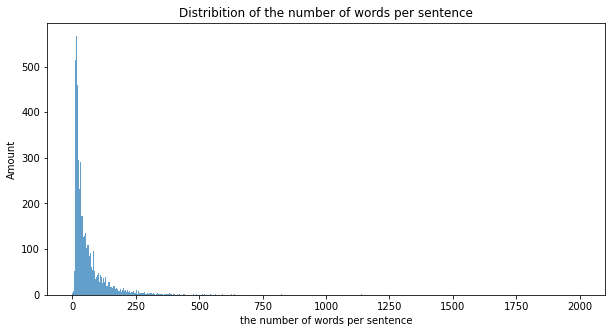

In [63]:
# for training set
# Put the number of words in each sentence into a list
len_sentence= []
for encode_list in train_encode:
  len_sentence.append(len(encode_list))

## len_sentence[1]

# find the distribution of the number of words in each sentence
plt.figure(figsize=(10,5))
plt.hist(len_sentence, bins=600, alpha=0.7,range = (0,2000))
plt.xlabel('the number of words per sentence')
plt.ylabel('Amount')
plt.title('Distribition of the number of words per sentence')
plt.show()

###Padding

In [64]:
# padding (unify the sentence length)
def padding_unify (encoding, unify_length):
  padding = []
  for encode_list in encoding:
    if len(encode_list) < unify_length:
      encode_list += [0] * (unify_length - len(encode_list))
    elif len(encode_list) > unify_length:
     encode_list = encode_list[:unify_length]
    padding.append(encode_list)
  return padding

unify_length = 256

# for training set
train_encode_padding = np.array(padding_unify(train_encode,unify_length))

# for validation set
validation_encode_padding = np.array(padding_unify(validation_encode,unify_length))

# for test set
test_encode_padding = np.array(padding_unify(test_encode,unify_length))

# for kaggletest set
kaggletest_encode_padding = np.array(padding_unify(kaggletest_encode,unify_length))

# print(len(encode_padding_train[5]))
# print(encode_padding_train[5])
# print(len(encode_padding_train))

### Dataset reshape

In [65]:
print(pd.unique(df_train['rating']))
print(pd.unique(df_val['rating']))
print(pd.unique(df_test['rating']))

df_train['rating'] = df_train['rating']-1
df_val['rating'] = df_val['rating']-1
df_test['rating'] = df_test["rating"]-1

print(pd.unique(df_train['rating']))
print(pd.unique(df_val['rating']))
print(pd.unique(df_test['rating']))

[1 3 5 4 2]
[5 2 1 3 4]
[1 2 5 4 3]
[0 2 4 3 1]
[4 1 0 2 3]
[0 1 4 3 2]


In [66]:
train_rating = df_train['rating']
validation_rating = df_val['rating']
test_rating = df_test["rating"]


#check the shape
print(train_encode_padding.shape)
print(validation_encode_padding.shape)
print(test_encode_padding.shape)
print(kaggletest_encode_padding.shape)
print(train_rating.shape)
print(validation_rating.shape)
print(test_rating.shape)

(5760, 256)
(1440, 256)
(1800, 256)
(3000, 256)
(5760,)
(1440,)
(1800,)


In [67]:
train_rating=np.array(train_rating)
validation_rating=np.array(validation_rating)
test_rating=np.array(test_rating)

# Model building and selection

###RNN

#### Seting

In [68]:
# Specifying hyperparameters

total_epoch = 20

dropout = 0.5

embedding = 16

hidden = 32  #2^n

batch = 128 

learning_rate = 0.001

num_class = 5               #fixed

vocab_size=len(vocabulary)  #fixed

In [69]:
from torch.utils.data import TensorDataset
training_set = TensorDataset(torch.from_numpy(train_encode_padding), torch.from_numpy(train_rating))

from torch.utils.data import DataLoader
train_loader = DataLoader(dataset = training_set, batch_size = batch, shuffle = True)

In [70]:
import torch
device=torch.device("cuda" if torch.cuda.is_available() else CPU)

#### Model

In [71]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size, num_class):
        super(RNN, self).__init__()
        self.word_embeddings=nn.Embedding(vocab_size,embedding_dim)
        self.rnn=nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.linear=nn.Linear(hidden_dim, num_class)
        self.Dropout=nn.Dropout(p=dropout)

    def forward(self,sentence):
        embeds = self.word_embeddings(sentence)
        rnn_out, h_n=self.rnn(embeds)
        x_last=rnn_out[:,-1,:]
        x_last=self.Dropout(x_last)
        tag_space=self.linear(x_last)
        return tag_space

model=RNN(embedding, hidden, vocab_size, num_class).to(device)
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

#### Train and result

In [72]:
from sklearn.metrics import accuracy_score

loss_list_train=[]
loss_list_test=[]

for epoch in range(total_epoch):
    loss_now=0.0
    acc_now=0.0

    for sentence, targets in train_loader:
        sentence=sentence.to(device)
        targets=targets.to(device)

        temp_batch_size=sentence.shape[0]

        model.train()
        optimizer.zero_grad()
        pred=model(sentence)
        loss=loss_function(pred.view(-1,pred.shape[-1]),targets.view(-1))
        loss.backward()
        optimizer.step()
        
        predicted = torch.argmax(pred,-1)
        acc=accuracy_score(predicted.view(-1).cpu().numpy(),targets.view(-1).cpu().numpy())

        loss_now += loss.item()*temp_batch_size
        acc_now += acc*temp_batch_size

    model.eval()
    train_acc=acc_now/len(training_set)
    train_loss=loss_now/len(training_set)
    outputs=model(torch.from_numpy(train_encode_padding).to(device))
    predicted=torch.argmax(outputs,1)
    f1=f1_score(train_rating, predicted.cpu().numpy().reshape(-1),average="weighted")

    outputs_test=model(torch.from_numpy(validation_encode_padding).to(device))
    loss_test=loss_function(outputs_test,torch.from_numpy(validation_rating).view(-1).to(device))
    predicted_test=torch.argmax(outputs_test,1)
    f1_validation=f1_score(validation_rating,predicted_test.cpu().numpy(),average="weighted")

    loss_list_train.append(train_loss)
    loss_list_test.append(loss_test.item())

    print('Epoch: %d, train loss: %.4f, validation loss: %.4f, train f1_score: %.4f, validation f1_score: %.4f'%(epoch+1,
                                                                                                 train_loss,
                                                                                                 loss_test.item(),
                                                                                                 f1,
                                                                                                 f1_validation))




Epoch: 1, train loss: 1.5923, validation loss: 1.5853, train f1_score: 0.1035, validation f1_score: 0.1087
Epoch: 2, train loss: 1.5823, validation loss: 1.5859, train f1_score: 0.1197, validation f1_score: 0.1021
Epoch: 3, train loss: 1.5849, validation loss: 1.5856, train f1_score: 0.1206, validation f1_score: 0.1021
Epoch: 4, train loss: 1.5797, validation loss: 1.5855, train f1_score: 0.1211, validation f1_score: 0.1008
Epoch: 5, train loss: 1.5808, validation loss: 1.5855, train f1_score: 0.1220, validation f1_score: 0.1007
Epoch: 6, train loss: 1.5775, validation loss: 1.5871, train f1_score: 0.1222, validation f1_score: 0.1007
Epoch: 7, train loss: 1.5785, validation loss: 1.5854, train f1_score: 0.1122, validation f1_score: 0.1074
Epoch: 8, train loss: 1.5761, validation loss: 1.5861, train f1_score: 0.1244, validation f1_score: 0.0993
Epoch: 9, train loss: 1.5758, validation loss: 1.5867, train f1_score: 0.1251, validation f1_score: 0.0992
Epoch: 10, train loss: 1.5738, valida

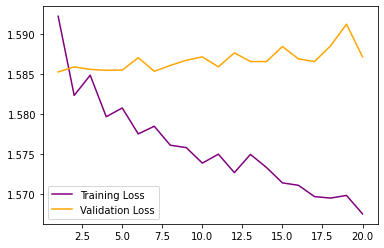

In [73]:
import matplotlib.pyplot as plt
plt.figure()
x=np.arange(1, total_epoch+1)
plt.plot(x, loss_list_train, label="Training Loss",color="purple")
plt.plot(x, loss_list_test, label="Validation Loss",color="orange")
plt.legend()
plt.show()

###LSTM

#### Seting

In [74]:
# Specifying hyperparameters

total_epoch = 20

dropout = 0.5

embedding = 16

hidden = 32  #2^n

batch = 128 

learning_rate = 0.001

num_class = 5               #fixed

vocab_size=len(vocabulary)  #fixed

#### Model

In [75]:
import torch.nn as nn

class LSTM(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size, num_class):
        super(LSTM, self).__init__()
        self.word_embeddings=nn.Embedding(vocab_size,embedding_dim)
        self.lstm=nn.LSTM(embedding_dim,hidden_dim,batch_first=True)
        self.linear=nn.Linear(hidden_dim, num_class)
        self.Dropout=nn.Dropout(p=dropout)

    def forward(self,sentence):
        embeds=self.word_embeddings(sentence)
        lstm_out, (h_n,c_n)=self.lstm(embeds)
        x_last=lstm_out[:,-1,:]
        x_last=self.Dropout(x_last)
        tag_space=self.linear(x_last)
        return tag_space

model=LSTM(embedding, hidden, vocab_size, num_class).to(device)
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

#### Train and result

In [76]:
from sklearn.metrics import accuracy_score

loss_list_train=[]
loss_list_test=[]

for epoch in range(total_epoch):
    loss_now=0.0
    acc_now=0.0

    for sentence, targets in train_loader:
        sentence=sentence.to(device)
        targets=targets.to(device)

        temp_batch_size=sentence.shape[0]

        model.train()
        optimizer.zero_grad()
        pred=model(sentence)
        loss=loss_function(pred.view(-1,pred.shape[-1]),targets.view(-1))
        loss.backward()
        optimizer.step()
        
        predicted = torch.argmax(pred,-1)
        acc=accuracy_score(predicted.view(-1).cpu().numpy(),targets.view(-1).cpu().numpy())

        loss_now += loss.item()*temp_batch_size
        acc_now += acc*temp_batch_size

    model.eval()
    train_acc=acc_now/len(training_set)
    train_loss=loss_now/len(training_set)
    outputs=model(torch.from_numpy(train_encode_padding).to(device))
    predicted=torch.argmax(outputs,1)
    f1=f1_score(train_rating, predicted.cpu().numpy().reshape(-1),average="weighted")

    outputs_test=model(torch.from_numpy(validation_encode_padding).to(device))
    loss_test=loss_function(outputs_test,torch.from_numpy(validation_rating).view(-1).to(device))
    predicted_test=torch.argmax(outputs_test,1)
    f1_validation=f1_score(validation_rating,predicted_test.cpu().numpy(),average="weighted")

    loss_list_train.append(train_loss)
    loss_list_test.append(loss_test.item())

    print('Epoch: %d, train loss: %.4f, validation loss: %.4f, train f1_score: %.4f, validation f1_score: %.4f'%(epoch+1,
                                                                                                 train_loss,
                                                                                                 loss_test.item(),
                                                                                                 f1,
                                                                                                 f1_validation))




Epoch: 1, train loss: 1.5864, validation loss: 1.5854, train f1_score: 0.1225, validation f1_score: 0.1017
Epoch: 2, train loss: 1.5786, validation loss: 1.5868, train f1_score: 0.1215, validation f1_score: 0.1039
Epoch: 3, train loss: 1.5774, validation loss: 1.5855, train f1_score: 0.1218, validation f1_score: 0.1039
Epoch: 4, train loss: 1.5796, validation loss: 1.5855, train f1_score: 0.1215, validation f1_score: 0.1044
Epoch: 5, train loss: 1.5787, validation loss: 1.5857, train f1_score: 0.1210, validation f1_score: 0.1043
Epoch: 6, train loss: 1.5773, validation loss: 1.5851, train f1_score: 0.1211, validation f1_score: 0.1043
Epoch: 7, train loss: 1.5768, validation loss: 1.5852, train f1_score: 0.1206, validation f1_score: 0.1044
Epoch: 8, train loss: 1.5768, validation loss: 1.5860, train f1_score: 0.1190, validation f1_score: 0.1016
Epoch: 9, train loss: 1.5768, validation loss: 1.5850, train f1_score: 0.1198, validation f1_score: 0.1015
Epoch: 10, train loss: 1.5746, valida

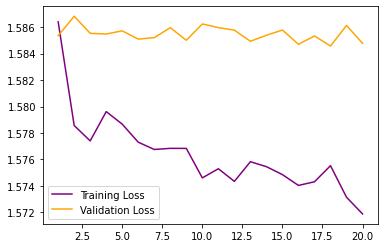

In [77]:
import matplotlib.pyplot as plt
plt.figure()
x=np.arange(1, total_epoch+1)
plt.plot(x, loss_list_train, label="Training Loss",color="purple")
plt.plot(x, loss_list_test, label="Validation Loss",color="orange")
plt.legend()
plt.show()

### BLSTM

#### Seting

In [78]:
# Specifying hyperparameters

total_epoch = 20

dropout = 0.5

embedding = 32

hidden = 16  #2^n

batch = 128 

learning_rate = 0.004

num_class = 5               #fixed

vocab_size=len(vocabulary)  #fixed

#### Model

In [79]:
from torch.utils.data import TensorDataset
training_set = TensorDataset(torch.from_numpy(train_encode_padding), torch.from_numpy(train_rating))

from torch.utils.data import DataLoader
train_loader = DataLoader(dataset = training_set, batch_size = batch, shuffle = True)

In [80]:
import torch
device=torch.device("cuda" if torch.cuda.is_available() else CPU)

In [81]:
import torch.nn as nn

class BiLSTM(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size, num_class):
        super(BiLSTM, self).__init__()
        self.word_embeddings=nn.Embedding(vocab_size,embedding_dim)
        self.lstm=nn.LSTM(embedding_dim,hidden_dim,batch_first=True, bidirectional=True)
        self.linear=nn.Linear(hidden_dim * 2, num_class)
        self.Dropout=nn.Dropout(p=dropout)

    def forward(self,sentence):
        embeds=self.word_embeddings(sentence)
        lstm_out, (h_n,c_n)=self.lstm(embeds)
        hidden_out=torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        hidden_out=self.Dropout(hidden_out)
        tag_space=self.linear(hidden_out)
        return tag_space


model=BiLSTM(embedding, hidden, vocab_size, num_class).to(device)
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

#### Train and Loss

In [82]:
from sklearn.metrics import accuracy_score

loss_list_train=[]
loss_list_test=[]

for epoch in range(total_epoch):
    loss_now=0.0
    acc_now=0.0

    for sentence, targets in train_loader:
        sentence=sentence.to(device)
        targets=targets.to(device)

        temp_batch_size=sentence.shape[0]

        model.train()
        optimizer.zero_grad()
        pred=model(sentence)
        loss=loss_function(pred.view(-1,pred.shape[-1]),targets.view(-1))
        loss.backward()
        optimizer.step()
        
        predicted = torch.argmax(pred,-1)
        acc=accuracy_score(predicted.view(-1).cpu().numpy(),targets.view(-1).cpu().numpy())

        loss_now += loss.item()*temp_batch_size
        acc_now += acc*temp_batch_size

    model.eval()
    train_acc=acc_now/len(training_set)
    train_loss=loss_now/len(training_set)
    outputs=model(torch.from_numpy(train_encode_padding).to(device))
    predicted=torch.argmax(outputs,1)
    f1=f1_score(train_rating, predicted.cpu().numpy().reshape(-1),average="weighted")

    outputs_test=model(torch.from_numpy(validation_encode_padding).to(device))
    loss_test=loss_function(outputs_test,torch.from_numpy(validation_rating).view(-1).to(device))
    predicted_test=torch.argmax(outputs_test,1)
    f1_validation=f1_score(validation_rating,predicted_test.cpu().numpy(),average="weighted")

    loss_list_train.append(train_loss)
    loss_list_test.append(loss_test.item())

    print('Epoch: %d, train loss: %.4f, validation loss: %.4f, train f1_score: %.4f, validation f1_score: %.4f'%(epoch+1,
                                                                                                 train_loss,
                                                                                                 loss_test.item(),
                                                                                                 f1,
                                                                                                 f1_validation))




Epoch: 1, train loss: 1.5771, validation loss: 1.5546, train f1_score: 0.2413, validation f1_score: 0.2256
Epoch: 2, train loss: 1.4933, validation loss: 1.4505, train f1_score: 0.3624, validation f1_score: 0.3209
Epoch: 3, train loss: 1.3594, validation loss: 1.3561, train f1_score: 0.4352, validation f1_score: 0.3739
Epoch: 4, train loss: 1.2291, validation loss: 1.2975, train f1_score: 0.5027, validation f1_score: 0.4126
Epoch: 5, train loss: 1.1299, validation loss: 1.2843, train f1_score: 0.5408, validation f1_score: 0.4236
Epoch: 6, train loss: 1.0450, validation loss: 1.3147, train f1_score: 0.5395, validation f1_score: 0.4130
Epoch: 7, train loss: 0.9869, validation loss: 1.3225, train f1_score: 0.6010, validation f1_score: 0.4415
Epoch: 8, train loss: 0.9124, validation loss: 1.3091, train f1_score: 0.6589, validation f1_score: 0.4534
Epoch: 9, train loss: 0.8701, validation loss: 1.3777, train f1_score: 0.6947, validation f1_score: 0.4411
Epoch: 10, train loss: 0.8124, valida

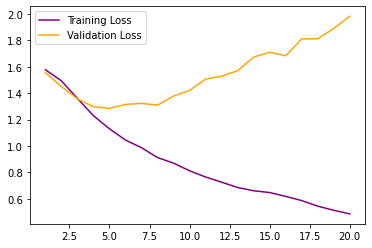

In [83]:
import matplotlib.pyplot as plt
plt.figure()
x=np.arange(1, total_epoch+1)
plt.plot(x, loss_list_train, label="Training Loss",color="purple")
plt.plot(x, loss_list_test, label="Validation Loss",color="orange")
plt.legend()
plt.show()

## Conclusion

**Comparing the performance in validation data for the three NN models(RNN,LSTM,BLSTM),we find BLSTM is the best one**

# Model Optimazation

**We fine-turn the BLSTM and try different hyperparameters by hand for it,and try different configures.**

**In the processing we need to clear the output of training to avoid  epoch accumulate.** 

**We try to use EarlyStopping to Halt the Training of Neural Networks At the Right Time**

#Model Evaluation

##Data preparation -combine vali +test=training_data

In [84]:
from torch.utils.data import TensorDataset

TrainValidation_rating=np.concatenate((train_rating,validation_rating),axis=0)

TrainValidation_encode_padding=np.concatenate((train_encode_padding, validation_encode_padding),axis=0)

print(TrainValidation_encode_padding.shape)
print(TrainValidation_rating.shape)

training_data = TensorDataset(torch.from_numpy(TrainValidation_encode_padding), torch.from_numpy(TrainValidation_rating))
test_data = TensorDataset(torch.from_numpy(test_encode_padding), torch.from_numpy(test_rating))

from torch.utils.data import DataLoader
train_loader = DataLoader(dataset=training_data, batch_size=batch, shuffle=True)

(7200, 256)
(7200,)


## Optimal configure  for BLSTM

In [85]:
# Specifying hyperparameters

total_epoch = 20

dropout = 0.5

embedding = 32

hidden = 16  #2^n

batch = 128 

learning_rate = 0.004

num_class = 5               #fixed

vocab_size=len(vocabulary)  #fixed

## Retrain BLSTM(train+ vali),showing the test performance

In [86]:
###BiLSTM
import torch.nn as nn

class BiLSTM(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size, num_class):
        super(BiLSTM, self).__init__()
        self.word_embeddings=nn.Embedding(vocab_size,embedding_dim)
        self.lstm=nn.LSTM(embedding_dim,hidden_dim,batch_first=True, bidirectional=True)
        self.linear=nn.Linear(hidden_dim * 2, num_class)
        self.Dropout=nn.Dropout(p=dropout)

    def forward(self,sentence):
        embeds=self.word_embeddings(sentence)
        lstm_out, (h_n,c_n)=self.lstm(embeds)
        hidden_out=torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        hidden_out=self.Dropout(hidden_out)
        tag_space=self.linear(hidden_out)
        return tag_space

model=BiLSTM(embedding, hidden, vocab_size, num_class).to(device)
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [87]:
from sklearn.metrics import accuracy_score

loss_list_train=[]
loss_list_test=[]

for epoch in range(total_epoch):
    loss_now=0.0
    correct=0

    for sentence, targets in train_loader:
        sentence=sentence.to(device)
        targets=targets.to(device)

        temp_batch_size=sentence.shape[0]

        model.train()
        optimizer.zero_grad()
        pred=model(sentence)
        predicted = torch.argmax(pred,-1)
        acc=accuracy_score(predicted.view(-1).cpu().numpy(),targets.view(-1).cpu().numpy())#view =numpy reshape,-1 means an indeterminate number,
        loss=loss_function(pred.view(-1,pred.shape[-1]),targets.view(-1))
        loss.backward()
        optimizer.step()
       
        correct +=acc*temp_batch_size
        loss_now += loss.item()*temp_batch_size
        

    model.eval()
#For  train+vali new train performance
    train_acc=correct/len(training_data)
    train_loss=loss_now/len(training_data)
    outputs=model(torch.from_numpy(TrainValidation_encode_padding).to(device))
    predicted=torch.argmax(outputs,1)
    f1=f1_score(TrainValidation_rating, predicted.cpu().numpy().reshape(-1),average="weighted")
    #add accuracy

#For splitted test performance    
    outputs_test=model(torch.from_numpy(test_encode_padding).to(device))
    loss_test=loss_function(outputs_test,torch.from_numpy(test_rating).view(-1).to(device))
    predicted_test=torch.argmax(outputs_test,1)
    f1_test=f1_score(test_rating,predicted_test.cpu().numpy(),average="weighted")

#For predictions of Kaggle
    outputs_kaggletest=model(torch.from_numpy(kaggletest_encode_padding).to(device))
    predicted_kaggletest=torch.argmax(outputs_kaggletest,1)

#For graph create a list for the final train loss and test loss 
    loss_list_train.append(train_loss)
    loss_list_test.append(loss_test.item())

    print('Epoch: %d,train acc: %.4f, train loss: %.4f, test loss: %.4f, train f1_score: %.4f, test f1_score: %.4f'%(epoch+1,train_acc,                               
                                                                                                 train_loss,
                                                                                                 loss_test.item(),
                                                                                                 f1,
                                                                                                 f1_test))
                                                                                                 




Epoch: 1,train acc: 0.2942, train loss: 1.5482, test loss: 1.4961, train f1_score: 0.3107, test f1_score: 0.2807
Epoch: 2,train acc: 0.3828, train loss: 1.4103, test loss: 1.3353, train f1_score: 0.3991, test f1_score: 0.3644
Epoch: 3,train acc: 0.4532, train loss: 1.2507, test loss: 1.2636, train f1_score: 0.4814, test f1_score: 0.4156
Epoch: 4,train acc: 0.5007, train loss: 1.1355, test loss: 1.2300, train f1_score: 0.5508, test f1_score: 0.4436
Epoch: 5,train acc: 0.5356, train loss: 1.0438, test loss: 1.2275, train f1_score: 0.5861, test f1_score: 0.4736
Epoch: 6,train acc: 0.5696, train loss: 0.9689, test loss: 1.2608, train f1_score: 0.6382, test f1_score: 0.4666
Epoch: 7,train acc: 0.6139, train loss: 0.9020, test loss: 1.2827, train f1_score: 0.6668, test f1_score: 0.4641
Epoch: 8,train acc: 0.6332, train loss: 0.8491, test loss: 1.2898, train f1_score: 0.7169, test f1_score: 0.4936
Epoch: 9,train acc: 0.6700, train loss: 0.7884, test loss: 1.3855, train f1_score: 0.7290, test 

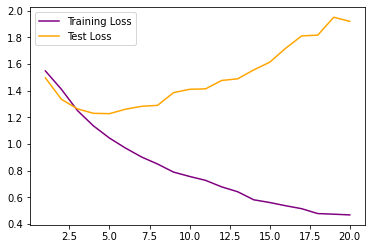

In [88]:
import matplotlib.pyplot as plt
plt.figure()
x=np.arange(1, total_epoch+1)
plt.plot(x, loss_list_train, label="Training Loss",color="purple")
plt.plot(x, loss_list_test, label="Test Loss",color="orange")
plt.legend()
plt.show()

#Predictions

In [89]:
predictions=predicted_kaggletest+1
print(predicted_kaggletest.shape)

torch.Size([3000])


In [90]:
sample_submission=pd.read_csv("sample_submission.csv", index_col = 0)
sample_submission["Prediction"]=predictions.cpu()
sample_submission

,Prediction
Id,
0,4
1,3
2,3
3,4
4,4
...,...
2995,2
2996,4
2997,5


In [91]:
sample_submission.to_csv("my_submission.csv")

#Reference

LSTM &BLSTM
https://galhever.medium.com/sentiment-analysis-with-pytorch-part-4-lstm-bilstm-model-84447f6c4525

LSTM https://towardsdatascience.com/sentence-classification-using-bi-lstm-b74151ffa565

Early Stoping

https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/